In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:


nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")
sf_permits = pd.read_csv("Building_Permits.csv")

#seed for reproducibility
np.random.seed(0)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
nfl_data.sample(5)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
244485,2014-10-26,2014102607,18,3,1.0,00:39,1,939.0,12.0,TB,...,1.240299,0.225647,0.774353,0.245582,0.754418,0.225647,0.019935,-0.018156,0.038091,2014
115340,2011-11-20,2011112000,22,4,1.0,06:47,7,407.0,44.0,OAK,...,NaN,0.056036,0.943964,0.042963,0.957037,0.943964,0.013073,NaN,NaN,2011
68357,2010-11-14,2010111401,8,2,NaN,00:23,1,1823.0,0.0,CLE,...,NaN,0.365307,0.634693,0.384697,0.615303,0.634693,-0.019390,NaN,NaN,2010
368377,2017-09-24,2017092405,24,4,1.0,08:48,9,528.0,8.0,CLE,...,1.075660,0.935995,0.064005,0.921231,0.078769,0.064005,0.014764,0.003866,0.010899,2017
384684,2017-11-05,2017110505,11,2,1.0,09:15,10,2355.0,0.0,DEN,...,NaN,0.928474,0.071526,0.934641,0.065359,0.071526,-0.006166,NaN,NaN,2017


In [28]:
sf_permits.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
78651,201503120624,8,otc alterations permit,03/12/2015,4273,029,2986,NaN,26th,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.74972976527956, -122.40963202424835)",1374057173006
177779,201707071220,8,otc alterations permit,07/07/2017,0453,004A,950,NaN,Bay,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Russian Hill,94109.0,"(37.80472551510833, -122.42280760820965)",1469546420378
64978,M529127,8,otc alterations permit,10/21/2014,0478,011,1290,NaN,Chestnut,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,"(37.80244997614665, -122.42443255018165)",1359656465959
165958,201704073507,8,otc alterations permit,04/07/2017,6507,003A,1134,NaN,Noe,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Noe Valley,94114.0,"(37.750866393629146, -122.43209633372915)",1458922436280
147902,201701237639,8,otc alterations permit,01/23/2017,0623,001,1755,NaN,Van Ness,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Pacific Heights,94109.0,"(37.791925784456105, -122.42306858292103)",1450933235988


In [29]:
#get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

In [30]:
print(missing_values_count)

Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            61154
time                              224
TimeUnder                           0
TimeSecs                          224
PlayTimeDiff                      444
SideofField                       528
yrdln                             840
yrdline100                        840
ydstogo                             0
ydsnet                              0
GoalToGo                          840
FirstDown                       28811
posteam                         24992
DefensiveTeam                   24992
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
ExPointResult                  397578
TwoPointConv                   407083
DefTwoPoint                    407664
Safety      

In [31]:
#how many total missing values do we have
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

#percent of data that is missin
(total_missing/total_cells) * 100


24.87214126835169

E:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


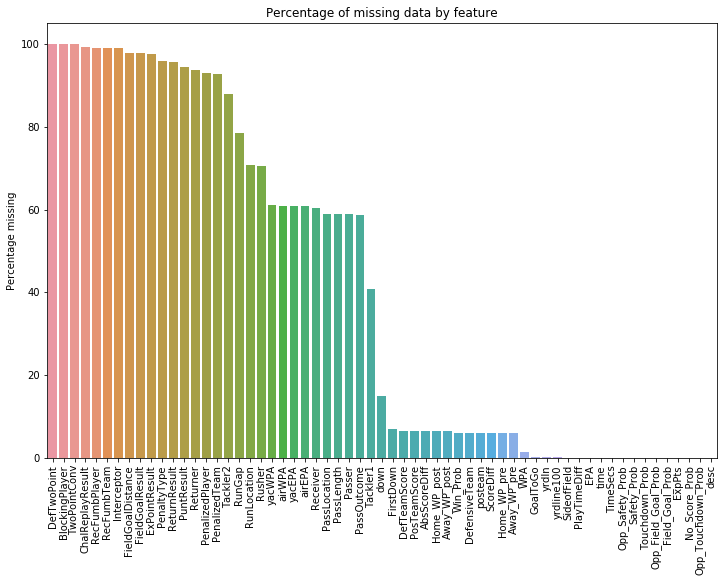

In [32]:
# get percentage of missing values
df_na = (nfl_data.isnull().sum() / len(nfl_data)) * 100

# drop columns without missing values and sort
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)

# create plot
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='Percentage of missing data by feature', ylabel='Percentage missing')
plt.show()

Almost a quarter of the cells in NFL dataset is empty.

In [33]:
total_cells_sfpermits = np.product(sf_permits.shape)
total_missing_sfpermits = sf_permits.isnull().sum().sum()
(total_missing_sfpermits / total_cells_sfpermits) * 100

26.260023150584029

In [34]:
#remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [35]:
#remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [36]:
#how much data was lost
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


In [37]:
#exploring na's in sf_permission datasets
sf_permits.shape

(198900, 43)

In [38]:
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [39]:
sf_permits_columns_with_na_dropped = sf_permits.dropna(axis=1)
sf_permits_columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [40]:
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % sf_permits_columns_with_na_dropped.shape[1])


Columns in original dataset: 43 

Columns with na's dropped: 12


E:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


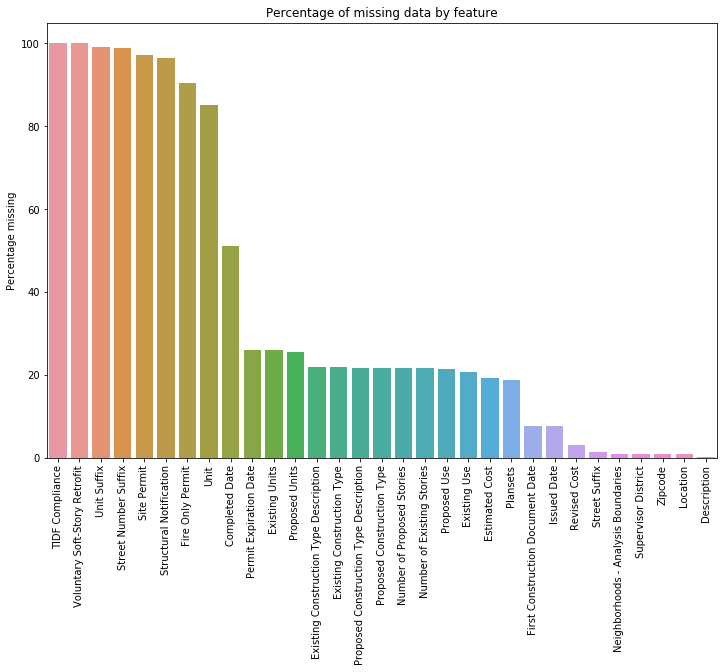

In [41]:
# get percentage of missing values
df_na = (sf_permits.isnull().sum() / len(sf_permits)) * 100

# drop columns without missing values and sort
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)

# create plot
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='Percentage of missing data by feature', ylabel='Percentage missing')
plt.show()

# Filling in missing values automatically


In [42]:
#get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA' : 'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [43]:
#replacing all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [44]:
#replace all NA's the value that comes directly after it in the same column
#then replace all the remaining na's with 0
subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [45]:
#filling sf_permits NA's
sf_permits.fillna(method = 'bfill', axis=0).fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,A,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,Y,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,A,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,A,Revere,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,A,Fell,St,...,5.0,wood frame (5),5.0,wood frame (5),Y,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,A,Alpine,Tr,...,5.0,wood frame (5),5.0,wood frame (5),Y,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171
